## Pokemon DB :

Download the "pokedex.sqlite" db from : https://www.dropbox.com/s/dhcz0ryqoxeqqrf/pokedex.sqlite?dl=0

Try to explore and see what is in the DB:

In [1]:
import sqlite3
con = sqlite3.connect("./pokedex.sqlite")
cur=con.cursor()

In [2]:
# Use this command below to see the list of tables in the DB
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
all_tables=cur.fetchall()

### Types :

In [3]:
# Write a query to output the type_id, name for different type of Pokemon and only when the language is English.
cur.execute("SELECT type_id, name FROM 'type_names' WHERE local_language_id=9;")
cur.fetchall()

[(1, 'Normal'),
 (2, 'Fighting'),
 (3, 'Flying'),
 (4, 'Poison'),
 (5, 'Ground'),
 (6, 'Rock'),
 (7, 'Bug'),
 (8, 'Ghost'),
 (9, 'Steel'),
 (10, 'Fire'),
 (11, 'Water'),
 (12, 'Grass'),
 (13, 'Electric'),
 (14, 'Psychic'),
 (15, 'Ice'),
 (16, 'Dragon'),
 (17, 'Dark'),
 (10001, '???'),
 (10002, 'Shadow')]

### Gen 1 moves :

In [65]:
# Write a query to output the name of the move and name of the type for Generation 1 Pokemon. 
#You wanna look into move_names,moves and type_names tables

#You should see an output like this :



[(u'Pound', u'Normal'),
 (u'DoubleSlap', u'Normal'),
 (u'Comet Punch', u'Normal'),
 (u'Mega Punch', u'Normal'),
 (u'Pay Day', u'Normal'),
 (u'Scratch', u'Normal'),
 (u'ViceGrip', u'Normal'),
 (u'Guillotine', u'Normal'),
 (u'Razor Wind', u'Normal'),
 (u'Swords Dance', u'Normal'),
 (u'Cut', u'Normal'),
 (u'Whirlwind', u'Normal'),
 (u'Bind', u'Normal'),
 (u'Slam', u'Normal'),
 (u'Stomp', u'Normal'),
 (u'Mega Kick', u'Normal'),
 (u'Headbutt', u'Normal'),
 (u'Horn Attack', u'Normal'),
 (u'Fury Attack', u'Normal'),
 (u'Horn Drill', u'Normal'),
 (u'Tackle', u'Normal'),
 (u'Body Slam', u'Normal'),
 (u'Wrap', u'Normal'),
 (u'Take Down', u'Normal'),
 (u'Thrash', u'Normal'),
 (u'Double-Edge', u'Normal'),
 (u'Tail Whip', u'Normal'),
 (u'Leer', u'Normal'),
 (u'Growl', u'Normal'),
 (u'Roar', u'Normal'),
 (u'Sing', u'Normal'),
 (u'Supersonic', u'Normal'),
 (u'SonicBoom', u'Normal'),
 (u'Disable', u'Normal'),
 (u'Hyper Beam', u'Normal'),
 (u'Strength', u'Normal'),
 (u'Growth', u'Normal'),
 (u'Quick At

### It is hard to write custome queries each time. Lets use the power of Pandas/Python by getting everything into Pandas DF:

In [4]:
# Use "for loops" to read each table in the DB and store it as a df with the same name as the table.
cur.execute("SELECT identifier, type_names.name FROM 'moves' JOIN 'type_names' ON moves.type_id=type_names.type_id AND type_names.local_language_id=9 AND moves.generation_id=1 ORDER BY type_names.name;")
cur.fetchall()

[('twineedle', 'Bug'),
 ('pin-missile', 'Bug'),
 ('string-shot', 'Bug'),
 ('leech-life', 'Bug'),
 ('bite', 'Dark'),
 ('dragon-rage', 'Dragon'),
 ('thunderpunch', 'Electric'),
 ('thundershock', 'Electric'),
 ('thunderbolt', 'Electric'),
 ('thunder-wave', 'Electric'),
 ('thunder', 'Electric'),
 ('karate-chop', 'Fighting'),
 ('double-kick', 'Fighting'),
 ('jump-kick', 'Fighting'),
 ('rolling-kick', 'Fighting'),
 ('submission', 'Fighting'),
 ('low-kick', 'Fighting'),
 ('counter', 'Fighting'),
 ('seismic-toss', 'Fighting'),
 ('hi-jump-kick', 'Fighting'),
 ('fire-punch', 'Fire'),
 ('ember', 'Fire'),
 ('flamethrower', 'Fire'),
 ('fire-spin', 'Fire'),
 ('fire-blast', 'Fire'),
 ('gust', 'Flying'),
 ('wing-attack', 'Flying'),
 ('fly', 'Flying'),
 ('peck', 'Flying'),
 ('drill-peck', 'Flying'),
 ('mirror-move', 'Flying'),
 ('sky-attack', 'Flying'),
 ('night-shade', 'Ghost'),
 ('confuse-ray', 'Ghost'),
 ('lick', 'Ghost'),
 ('vine-whip', 'Grass'),
 ('absorb', 'Grass'),
 ('mega-drain', 'Grass'),
 ('l

## back to Pandas, some data exploration :

Download another Pokemon dataset from here :https://www.dropbox.com/s/ms0tixxeflq1toc/Pokemon.csv?dl=0 
Lets explore:

In [6]:
# Use "for loops" to read each table in the DB and store it as a df with the same name as the table.
import pandas as pd
table_headers =[]
for table in all_tables:
    table =table[0]
    name = table+"_df"
    query = "SELECT * FROM "+ table
    vars()[name] = pd.read_sql(query,con)
    print(name)
    #df.to_excel(table+'.xlsx')


conquest_move_displacements_df
encounter_methods_df
move_targets_df
berry_firmness_df
pokemon_move_methods_df
conquest_warrior_stats_df
item_flags_df
item_fling_effects_df
item_pockets_df
move_damage_classes_df
evolution_triggers_df
contest_effects_df
pokemon_habitats_df
genders_df
super_contest_effects_df
conquest_move_ranges_df
move_meta_categories_df
egg_groups_df
conquest_episodes_df
contest_types_df
move_flags_df
conquest_warrior_archetypes_df
conquest_stats_df
encounter_conditions_df
pokemon_colors_df
move_battle_styles_df
pal_park_areas_df
move_effects_df
regions_df
conquest_move_effects_df
growth_rates_df
languages_df
pokeathlon_stats_df
conquest_warrior_skills_df
pokemon_shapes_df
move_meta_ailments_df
stats_df
conquest_warrior_skill_names_df
conquest_move_displacement_prose_df
pokemon_color_names_df
encounter_condition_prose_df
item_fling_effect_prose_df
pokedexes_df
evolution_trigger_prose_df
experience_df
berry_firmness_names_df
move_meta_ailment_names_df
move_effect_prose_

In [7]:
#Let's rename the # column to id, and convert all column labels to lower case.
# use df.rename to rename the # column to id
# use df.columns.str.lower() to convert all column labels to lower case
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
#Let's rename the # column to id, and convert all column labels to lower case.
# use df.rename to rename the # column to id
df = df.rename(columns={'#': 'id'})
# use df.columns.str.lower() to convert all column labels to lower case
df.columns = df.columns.str.lower()
# you should see:
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
 # Lets exclude these duplicates in our analysis except for the first instance.
df = df.drop_duplicates(['id'],keep='first')
df[df.duplicated('id', keep=False)].head()
# use df.drop_duplicates



,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary


In [10]:
import numpy as np
df['type 2']

0      Poison
1      Poison
2      Poison
4         NaN
5         NaN
6      Flying
9         NaN
10        NaN
11        NaN
13        NaN
14        NaN
15     Flying
16     Poison
17     Poison
18     Poison
20     Flying
21     Flying
22     Flying
24        NaN
25        NaN
26     Flying
27     Flying
28        NaN
29        NaN
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
        ...  
762       NaN
763       NaN
764    Normal
765    Normal
766    Dragon
767    Dragon
768       Ice
769       Ice
770       NaN
771    Flying
772     Fairy
773     Fairy
774       NaN
775       NaN
776       NaN
777     Fairy
778     Grass
779     Grass
780     Grass
784     Grass
788       NaN
789       NaN
790    Dragon
791    Dragon
792       NaN
793    Flying
794    Ground
795     Fairy
797     Ghost
799     Water
Name: type 2, Length: 721, dtype: object

In [28]:
# Fill the Nan values
df['type 2']=df['type 2'].fillna("None")

In [29]:
#The dataset contains both information regarding the identity and statistics of each Pokemon species; therefore, 
#let's separate these two observational units into separate tables: pokedex and statistics.
# create pokedex with these columns: ['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']
pokedex = df[['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']]
pokedex.head()

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,None,1,False
5,5,Charmeleon,Fire,None,1,False


In [75]:
# create poke_statistics with these columns:['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']
poke_statistics = df[['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']]
poke_statistics.head()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
0,1,45,49,49,65,65,45,318
1,2,60,62,63,80,80,60,405
2,3,80,82,83,100,100,80,525
4,4,39,52,43,60,50,65,309
5,5,58,64,58,80,65,80,405


In [31]:
poke_statistics.describe()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,68.380028,75.124827,70.697642,68.848821,69.180305,65.714286,417.945908
std,208.27906,25.848272,29.070335,29.194941,28.898590,26.899364,27.277920,109.663671
min,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.000000
25%,181.00000,50.000000,54.000000,50.000000,45.000000,50.000000,45.000000,320.000000
50%,361.00000,65.000000,75.000000,65.000000,65.000000,65.000000,65.000000,424.000000
75%,541.00000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,499.000000
max,721.00000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,720.000000


### Now we have a clean dataset. 
### Lets see : How are Pokemon numbers distributed across generations?

In [32]:
# create a groupby to see below :
description = pokedex.groupby(['generation']).describe()
description.stack()

id
generation                  
1          count  151.000000
           mean    76.000000
           std     43.734045
           min      1.000000
           25%     38.500000
           50%     76.000000
           75%    113.500000
           max    151.000000
2          count  100.000000
           mean   201.500000
           std     29.011492
           min    152.000000
           25%    176.750000
           50%    201.500000
           75%    226.250000
           max    251.000000
3          count  135.000000
           mean   319.000000
           std     39.115214
           min    252.000000
           25%    285.500000
           50%    319.000000
           75%    352.500000
           max    386.000000
4          count  107.000000
           mean   440.000000
           std     31.032241
           min    387.000000
           25%    413.500000
           50%    440.000000
           75%    466.500000
           max    493.000000
5          count  156.000000
           mean   571.500000
           std     45.177428
           min    494.000000
           25%    532.750000
           50%    571.500000
           75%    610.250000
           max    649.000000
6          count   72.000000
           mean   685.500000
           std     20.928450
           min    650.000000
           25%    667.750000
           50%    685.500000
           75%    703.250000
           max    721.000000

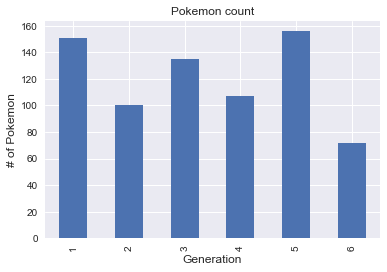

In [33]:
%matplotlib inline
# create plot below :
import matplotlib.pyplot as plt
ax = description[('id', 'count')].plot(kind='bar',title ="Pokemon count")
ax.set_xlabel("Generation", fontsize=12)
ax.set_ylabel("# of Pokemon", fontsize=12)

### Try Seaboarn:

In [34]:
import seaborn as sb

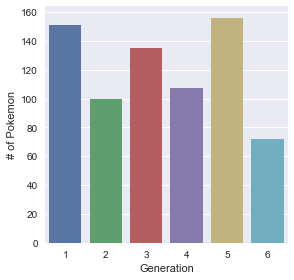

In [35]:
sb.factorplot(kind='count', data=pokedex, x='generation').set_axis_labels("Generation", "# of Pokemon")

#### There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.

#### Let's dig a bit deeper and examine the distribution of primary types of Pokemon across generations.

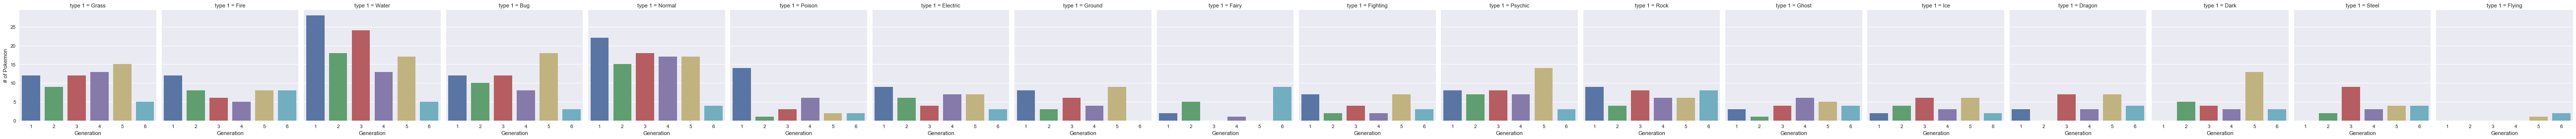

In [36]:
sb.factorplot(kind='count', 
              data=pokedex, 
              col='type 1',
              x='generation').set_axis_labels("Generation", "# of Pokemon")

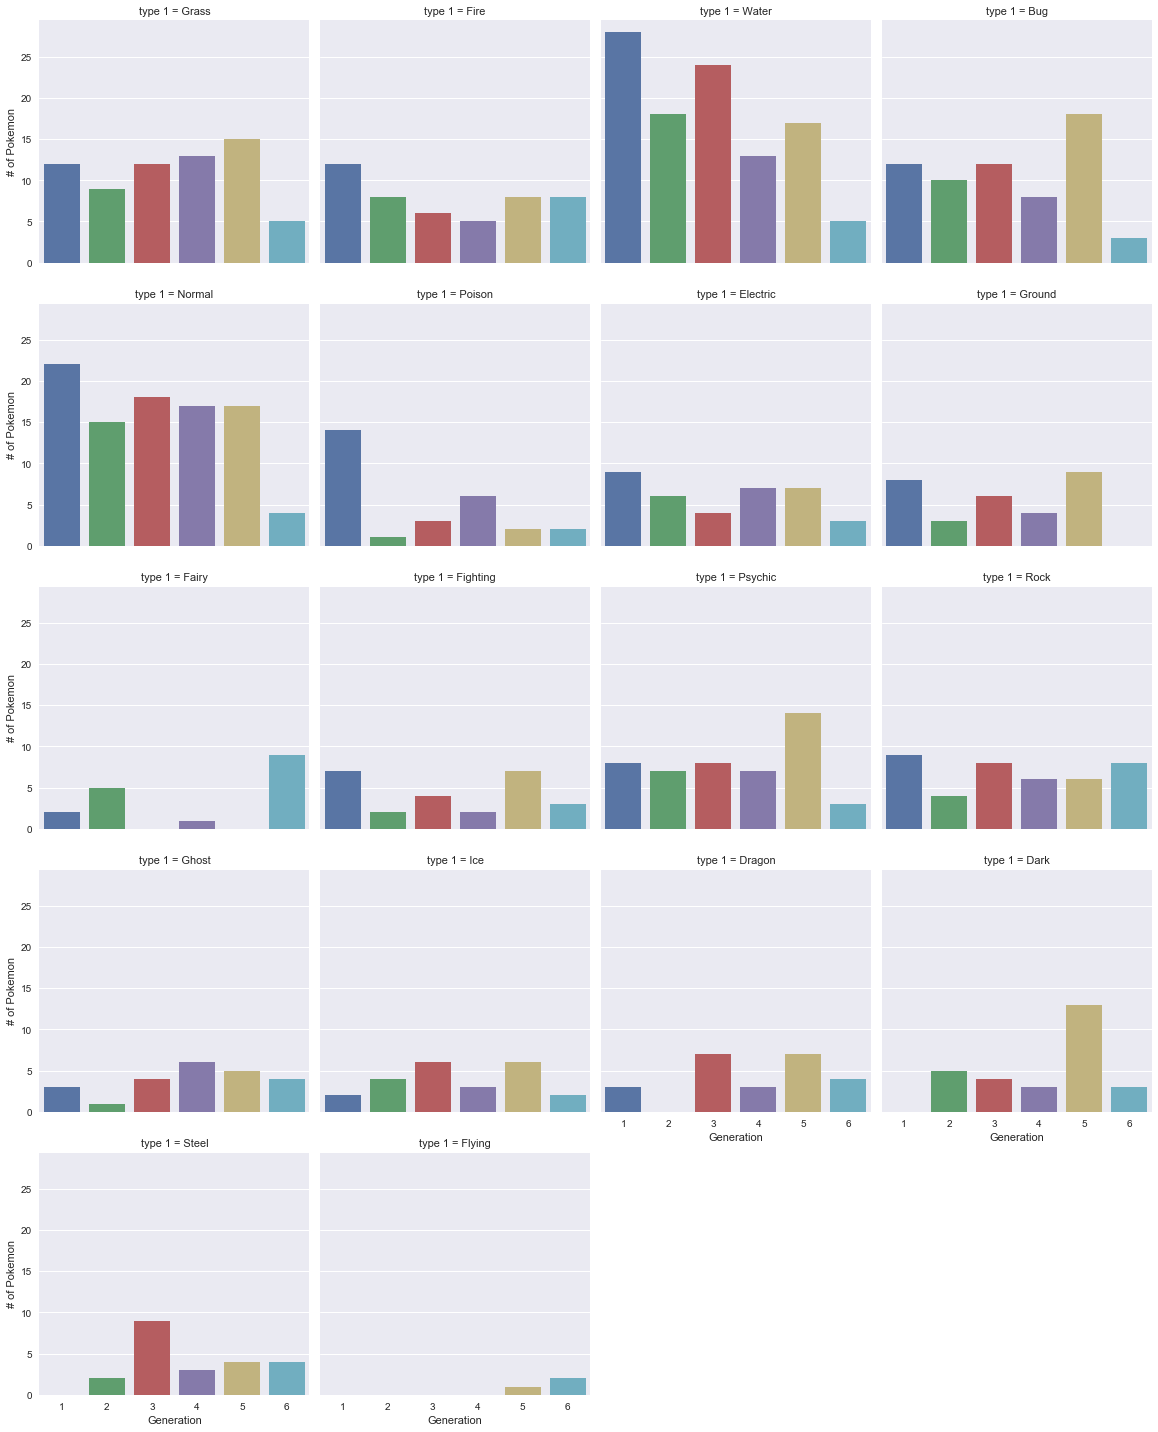

In [37]:
# Add col_wrap option to the above to get below (look into sb.factorplot documentation)
sb.factorplot(kind='count', 
              data=pokedex, 
              col='type 1',col_wrap=4,
              x='generation').set_axis_labels("Generation", "# of Pokemon")

In [38]:
#Summarize your observations/conclusions here :
#1. There are more pokemons for all generations in water
#2. The flying type pokemons are the least
#3. The highest number of pokemons are of Generation 1 and type water
#4. The Generation 1 pokemon seems to be the most common


### Are there unique primary or secondary Pokemon types, or if they simply share the same ones.

In [26]:
import numpy as np
?np.setdiff1d  #Return the sorted, unique values in `ar1` that are not in `ar2`.

In [39]:
unique_type1 =  np.setdiff1d(pokedex['type 1'], pokedex['type 2'])
unique_type1

array([], dtype=object)

In [40]:
unique_type2 =  np.setdiff1d(pokedex['type 2'], pokedex['type 1'])
unique_type2

array(['None'], dtype=object)

In [27]:
### There are no unique primary or secondary types

In [41]:
# Get The total number of primary and secondary types:
#df = pd.DataFrame(pokedex)
#dff = pd.DataFrame(poke_statistics)
#df.to_excel('pokedex.xlsx')
#dff.to_excel('poke_statistics.xlsx')
type_1 = len(pokedex['type 1'].unique())
type_2 = len(pokedex['type 2'].unique())
print("# of Type1 Pokemon: "+ str(type_1))
print("# of Type2 Pokemon: "+ str(type_2))

# of Type1 Pokemon: 18
# of Type2 Pokemon: 19


### What are the most common types of Pokemon?

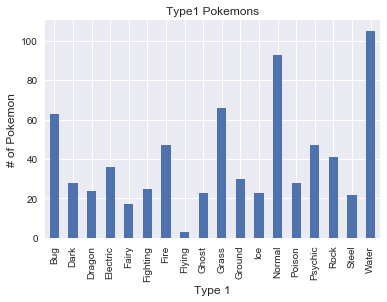

In [42]:
# Make a plot of the distribution of the Type 1 Pokemon.
pokedex = pd.DataFrame(pokedex)
ax = pokedex.groupby(['type 1'])['name'].nunique().plot(kind='bar',title ="Type1 Pokemons")
ax.set_xlabel("Type 1", fontsize=12)
ax.set_ylabel("# of Pokemon", fontsize=12)

# You should see something like the plot below. Sort the DB so that we see it in an ascending order !

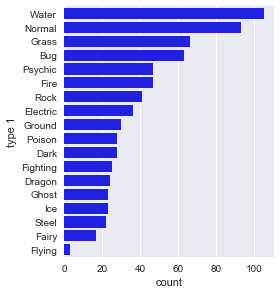

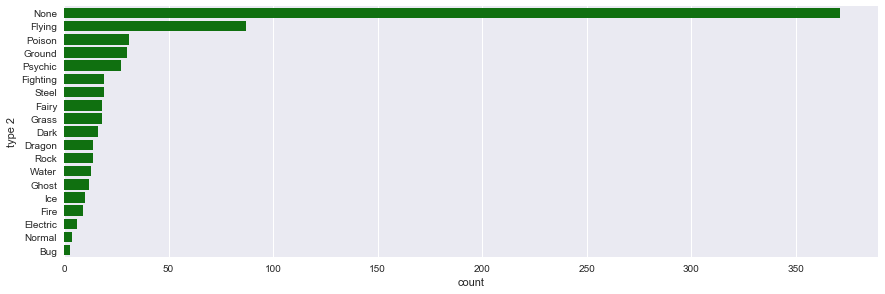

In [43]:
# Now try Seaborn:
sb.factorplot(data=pokedex,
               y='type 1',
                kind='count',
                 order = pokedex['type 1'].value_counts().index,
                 color='blue',
                     aspect=1)

sb.factorplot(data=pokedex,
               y='type 2',
                kind='count',
                 order = pokedex['type 2'].value_counts().index,
                 color='green',
                     aspect=3.1)

In [44]:
#Summarize your observations/conclusions here :
#1. Wter is the highest number of pokemon in type 1 and the highest overall
#2. Seems to be a lognormal distribution for the different types
#3. Flying is the highest number of pokemon in type2
#4. Lots of pokemons in type 1 do not have type 2
#5. There seems to be an inverse relationship between types. The highest in type 2 (Flying) is the lowest in Type 1
# and the higher types in type 1(Normal,Bug, fire) are on the lower ends in type 2

### But we can not say which type maps into which type !

Lets create a heatmap !

In [45]:
# Create a new df called "dual_types" by getting rid of the records for which we do not have Type 2
dual_types = pokedex[pokedex['type 2']!= "None"]
dual_types

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
6,6,Charizard,Fire,Flying,1,False
15,12,Butterfree,Bug,Flying,1,False
16,13,Weedle,Bug,Poison,1,False
17,14,Kakuna,Bug,Poison,1,False
18,15,Beedrill,Bug,Poison,1,False
20,16,Pidgey,Normal,Flying,1,False
21,17,Pidgeotto,Normal,Flying,1,False


In [47]:
# Get a grid of values from 'type 1' 'type 2'  (Hint: use groupby, size, unstack, values 
#and any other attributes you may need !)
(dual_types['type 1'].unique().size,dual_types['type 2'].unique().size)

(18, 18)

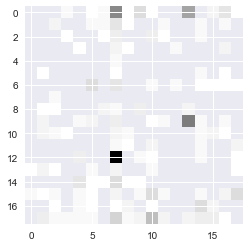

In [48]:
# Try matplotlib imshow as a way to get a heatmap, something like this:
import seaborn as sns
%matplotlib inline
#data = dual_types[['type 1', 'type 2']]
data = dual_types.groupby(['type 1', 'type 2']).count()['id']
data = data.unstack()
plt.imshow(data)


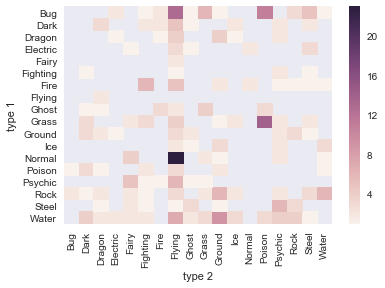

In [49]:
# Obviousely, the plot is not very nice !
# Use seaborn heatmap option to get something like this :
sns.heatmap(data)

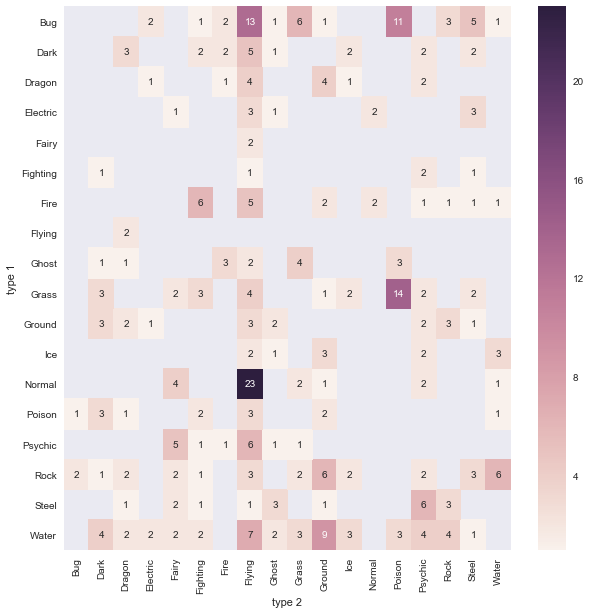

In [50]:
# Refine your seaborn expression to get a better heatmap :
plt.figure(figsize=(10, 10))
sns.heatmap(data, annot = True)

In [51]:
#Summarize your observations/conclusions here :
# Normal and Flying occur together in type 1 and type 2 simultaneously more frequently (23 times). 
#These two would have the highest correlation.


### Are any of the statistics correlated?

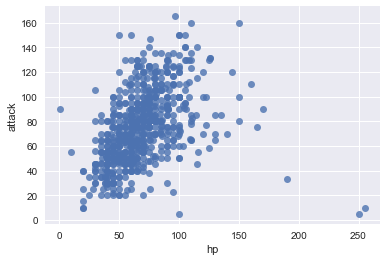

In [52]:
# It is a very natural question to ask.
# plot differernt combinations of quantities and see if you can see any correlation. Something like this:
# It is a very natural question to ask.
# plot differernt combinations of quantities and see if you can see any correlation. Something like this:
sns.regplot(x=poke_statistics["hp"], y=poke_statistics["attack"], fit_reg=False)
#There is some correlation between "hp" and "attack"

In [55]:
# It seems hard to see the correlation based on the scatter plots.

# Instead, use "pearsonr" function from scipy's "stats" library to compute the correlation between 
from scipy import stats
?stats.pearsonr

In [58]:
# Loop over all combinations and output the correlation coefficients. Then sort based on the coefficients
# Loop over all combinations and output the correlation coefficients. Then sort based on the coefficients
corr_coeffs =[]
cols =['hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed']
for column_x in poke_statistics.columns:
    for column_y in poke_statistics.columns:
        corr = stats.pearsonr(x=poke_statistics[column_x],y=poke_statistics[column_y])
        corr_coeffs.append(corr[0])
coeffs= [float(x) for x in corr_coeffs]
coeffs.sort()
pd.DataFrame(coeffs)

,0
0,-0.006849
1,-0.006849
2,0.028156
3,0.028156
4,0.104998
5,0.104998
6,0.107512
7,0.107512
8,0.115090
9,0.115090


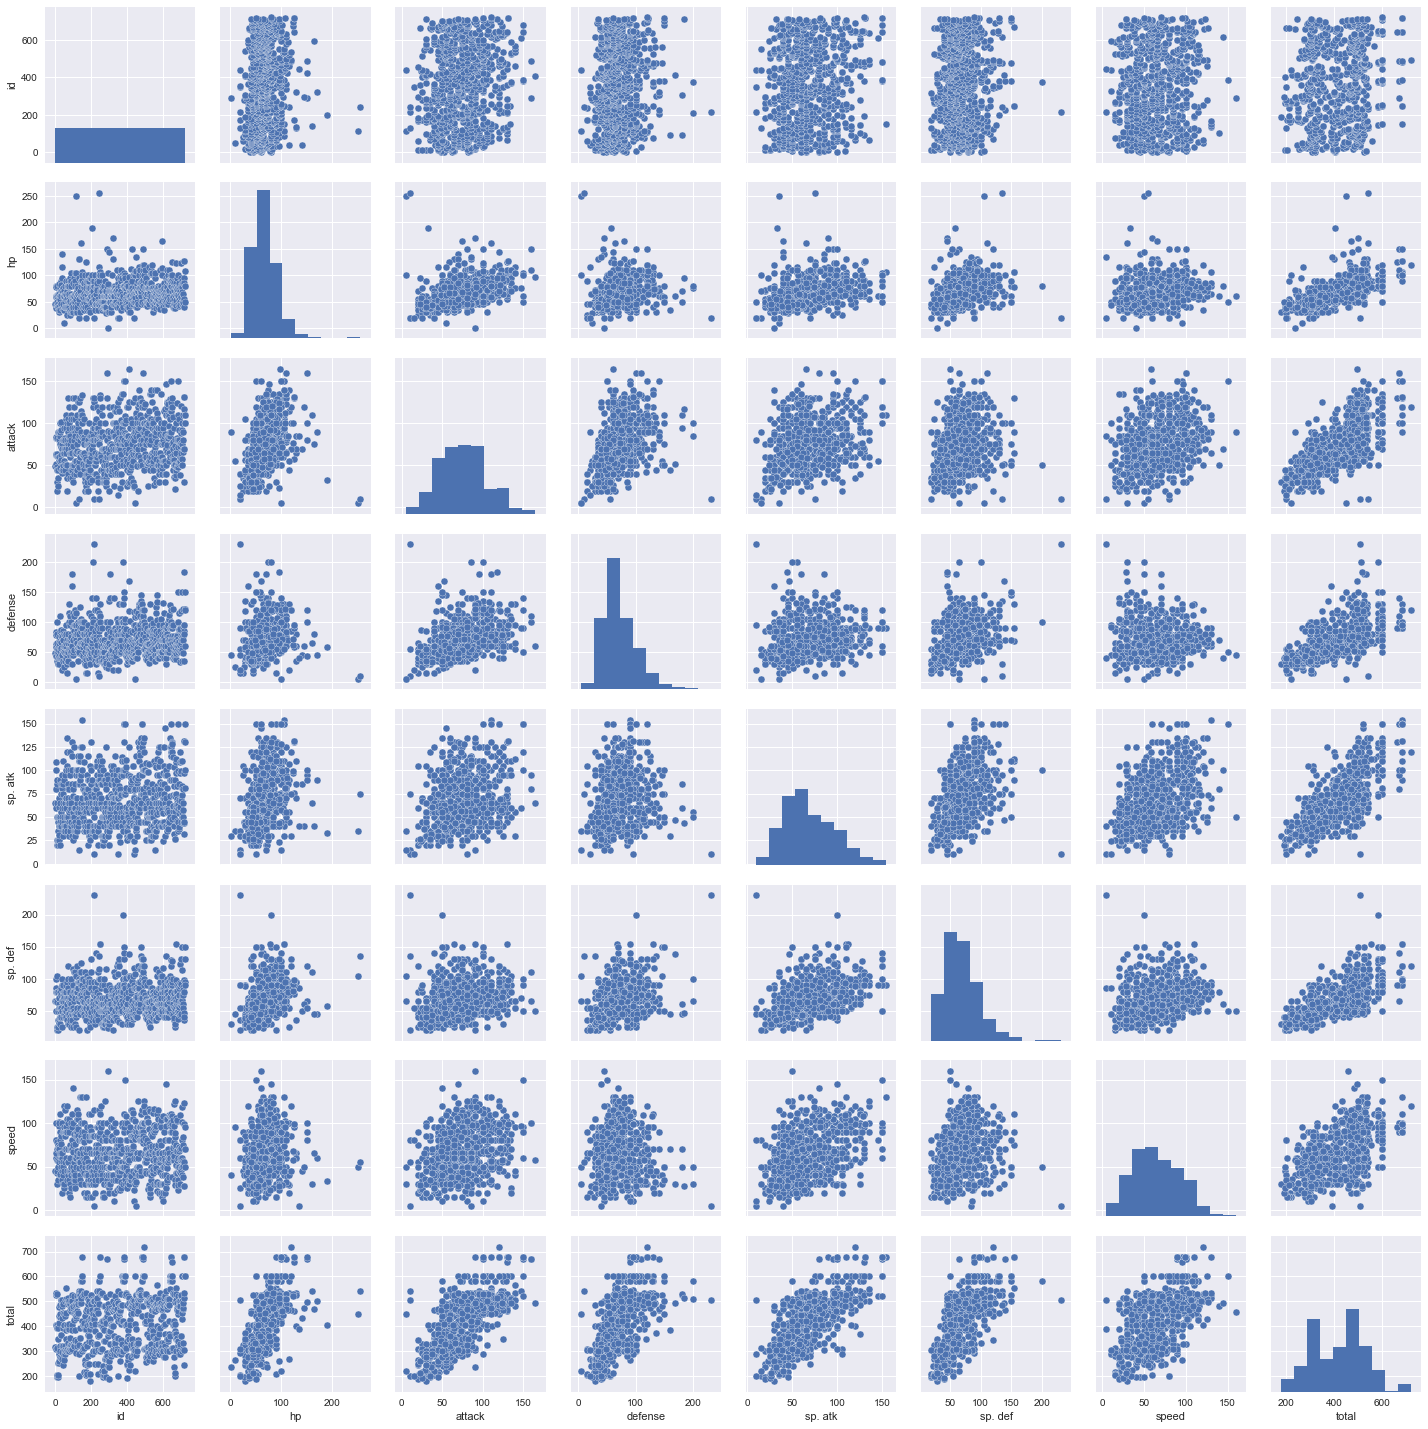

In [59]:
# Nothing is better than a good visualization. 
# Try seaborn's pairplot to get something like this :
# Nothing is better than a good visualization. 
# Try seaborn's pairplot to get something like this :
sns.pairplot(poke_statistics)

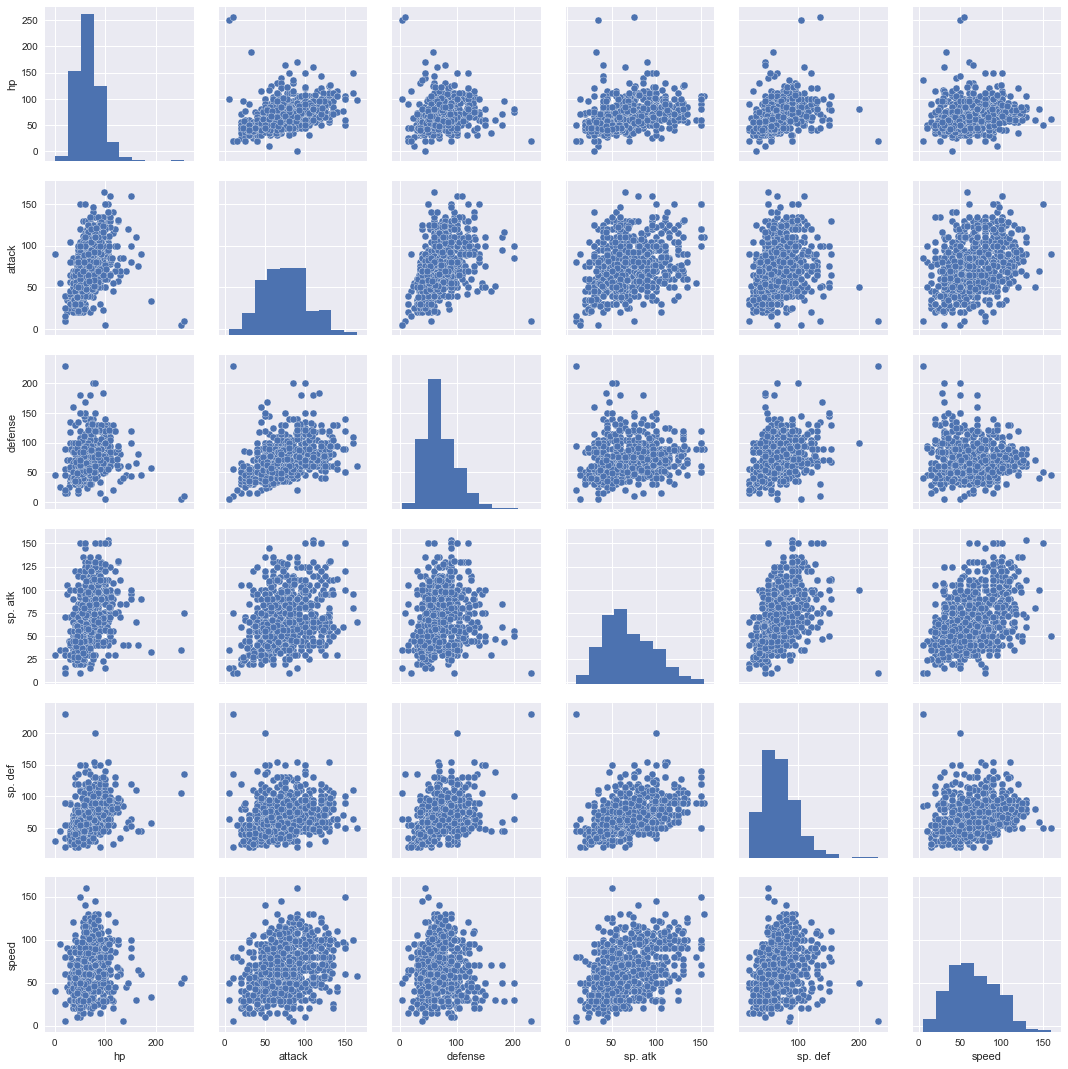

In [60]:
# Get rid of extra columns :
# Get rid of extra columns :
cols = ['hp','attack','defense','sp. atk','sp. def', 'speed']
sns.pairplot(poke_statistics[cols])

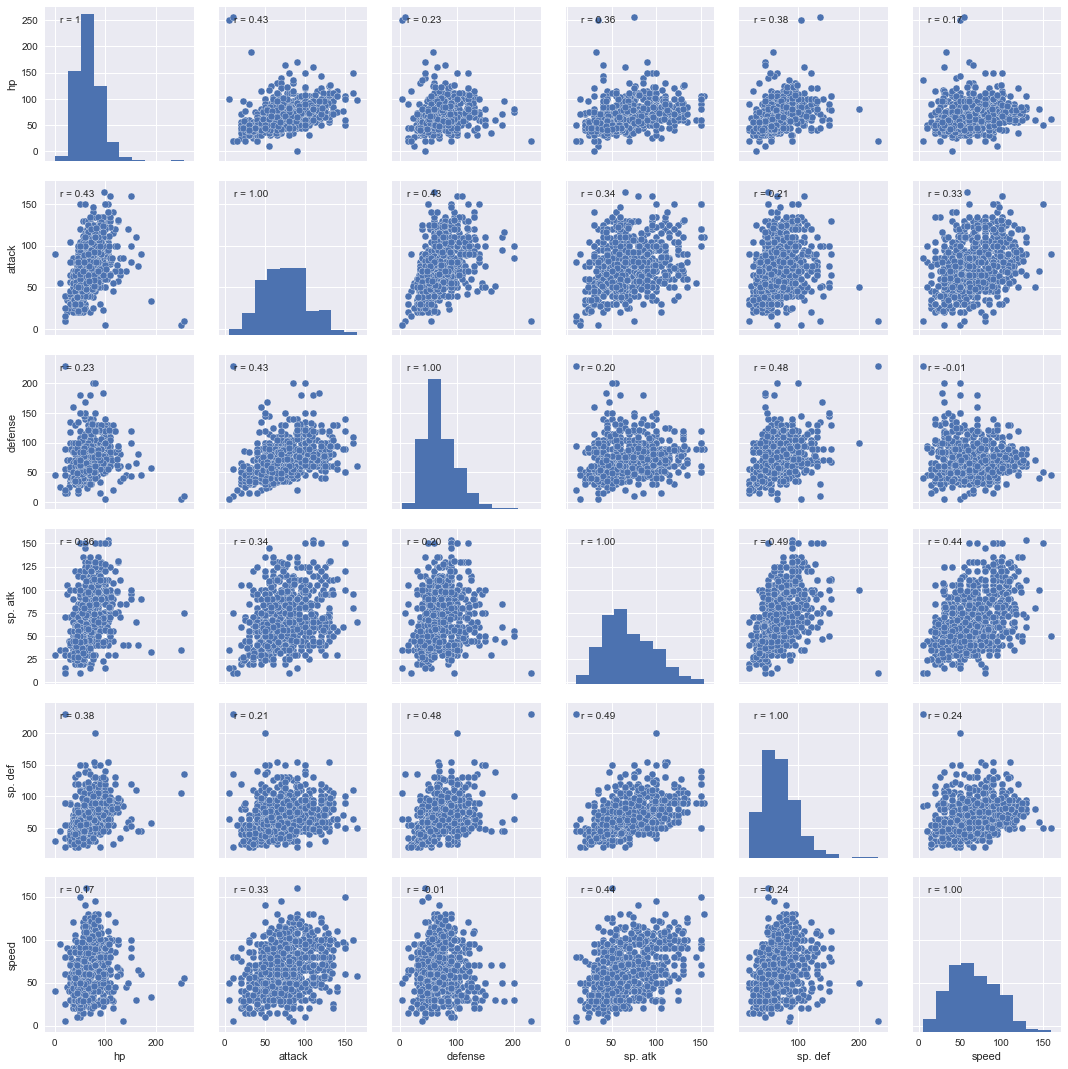

In [61]:
# See if you can refine your code to get this :
# See if you can refine your code to get this :
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    
statistics_plot = sns.pairplot(poke_statistics[cols])
statistics_plot.map(corrfunc)

In [62]:
#Summarize your observations/conclusions here :
#sp.atk and sp.def have the highest correlation(0.49). The correlation between the attributes are low and this implies that
#none of the values would be redundant in characterising each pokemon.

### What are the strongest and weakest Pokemon species?

In [63]:
# Do your calculations here :
pd.merge(pokedex, poke_statistics, on='id').sort_values('total', ascending=False).head()
pd.merge(pokedex, poke_statistics, on='id').sort_values('total', ascending=False).tail()
#Pokemon Arceus is the strongest by a total statistic and and Pokemon Sunkem is the weakest

,id,name,type 1,type 2,generation,legendary,hp,attack,defense,sp. atk,sp. def,speed,total
9,10,Caterpie,Bug,None,1,False,45,30,35,20,20,45,195
264,265,Wurmple,Bug,None,3,False,45,45,35,20,30,20,195
400,401,Kricketot,Bug,None,4,False,37,25,41,25,41,25,194
297,298,Azurill,Normal,Fairy,3,False,50,20,40,20,40,20,190
190,191,Sunkern,Grass,None,2,False,30,30,30,30,30,30,180


In [64]:
# Explain why using "Total" is not the best meric ?
#From observation of the head and tail, the Pokemons cannot be properly ranked using the Total statistics
#as there are similar values of 680 at the head and 195 at the tail. Total values does not also necesarily imply
#strength based on all statistics of the pokemon, there could be a bias from one statistic where a Pokemon is an outlier.

In [65]:
# Instead, try a different metric: standardize the six statistic columns independently by converting each 
# value into a z-score so when we do take the sum, we account for the variation in the each statistic using 
# its mean and standard deviation across all Pokemon species. 
z_scores=poke_statistics[cols].apply(lambda x: (x - x.mean()) / x.std())
z_scores.head()

,hp,attack,defense,sp. atk,sp. def,speed
0,-0.904510,-0.898676,-0.743199,-0.133184,-0.155405,-0.759379
1,-0.324201,-0.451485,-0.263664,0.385873,0.402229,-0.209484
2,0.449545,0.236501,0.421387,1.077948,1.145741,0.523710
4,-1.136634,-0.795478,-0.948714,-0.306203,-0.713039,-0.026185
5,-0.401575,-0.382687,-0.434926,0.385873,-0.155405,0.523710


In [77]:
# Define a new column, strength, as the sum of the z-scores of each statistic—the higher this value, 
# the stronger the Pokemon.
# Define a new column, strength, as the sum of the z-scores of each statistic—the higher this value, 
# the stronger the Pokemon.
poke_statistics = poke_statistics.drop(['total'], axis=1)
poke_statistics['strength'] = z_scores.sum(axis=1).values
poke_statistics.sort_values('strength', ascending=False).head()
#Pokemon 552 is now the strongest

,id,hp,attack,defense,sp. atk,sp. def,speed,strength
552,493,120,120,120,120,120,120,10.878816
544,487,150,100,120,100,120,90,9.559583
269,249,106,90,130,90,154,110,9.507000
270,250,106,130,90,110,154,90,9.471754
792,716,126,131,95,131,98,99,9.425945


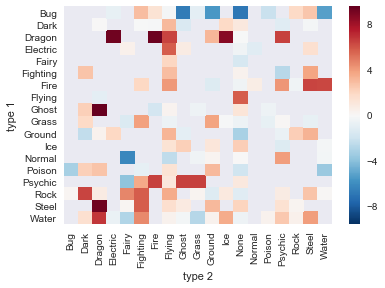

In [78]:
# Repeat the heatmap you created but now for the new strength metric you computed
# Repeat the heatmap you created but now for the new strength metric you computed
full_table=pd.merge(pokedex,poke_statistics, on="id")
full_table = full_table.groupby(['type 1', 'type 2']).median().loc[:,'strength'].unstack()
sns.heatmap(full_table)

### Do any types of Pokemon excel at certain statistics over others?

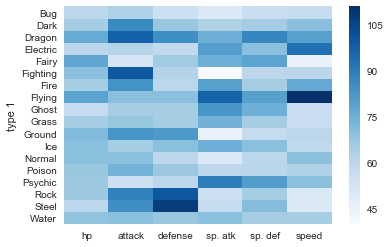

In [79]:
# Do your calculations here. Create a heat map to show this at the end.
full_table=pd.merge(pokedex,poke_statistics, on="id")
check_stats = full_table.groupby(['type 1']).median().loc[:,'hp':'speed']
sns.heatmap(check_stats,cmap="Blues")

#Results show the flying type pokemon species have a higher speed and Rock and steel have a better defense. Fighting Pokemon 
#are also good in attack.

### Are any of the statistics correlated?

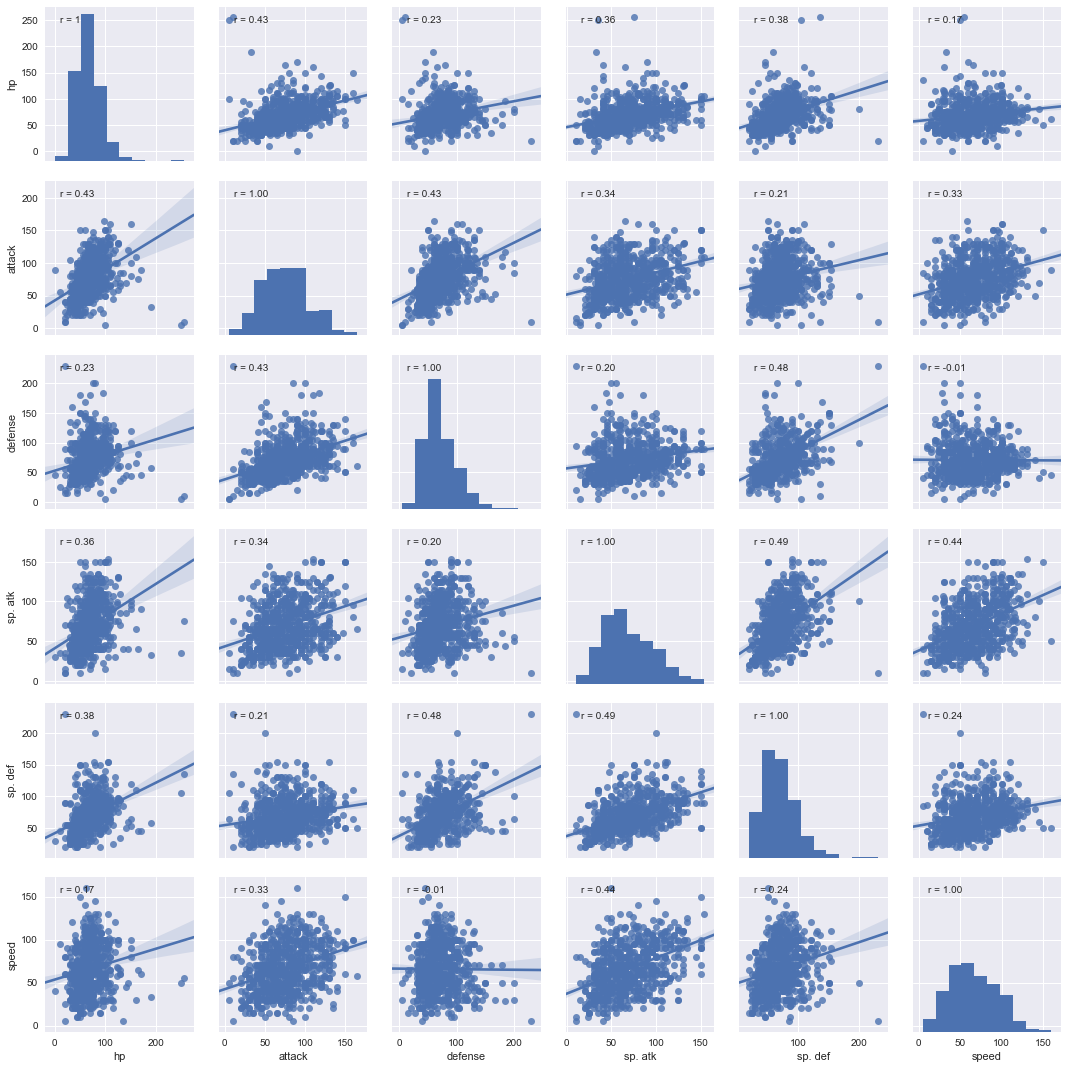

In [80]:
# Do your calculations here. Create a set of correlation plots as you did before to show this at the end.
# Do your calculations here. Create a set of correlation plots as you did before to show this at the end.
# See if you can refine your code to get this :
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    
g = sns.pairplot(poke_statistics[cols],kind="reg")
g.map(corrfunc)

In [81]:
# Summarize your observation here :
#Summarize your observations/conclusions here :

#sp.atk and sp.def have the highest correlation(0.49). The correlation between the attributes are low and this implies that
#none of the values would be redundant in characterising each pokemon.In general the top five most correlated attributes are:

#1. special attack/special defense
#2. defense/special defense
#3. attack/defense
#4. attack/HP
#5. special attack/speed

#And the three least correlated statistics are:
# speed/defense
# hp/speed
# defense/special attack